In [1]:
import matplotlib.pyplot as plt
import yqd

### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_answers import *
### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')
original_dataset = np.loadtxt('datasets/apple_prices.csv')

/Users/yifantian/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/yifantian/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:

def read_stock(index):
    yf_data = yqd.load_yahoo_quote(index, '201704013', '20180418')
    history = []
    history1 = []
    days = []
    for i,day in enumerate(yf_data[1:-1]):
        data = day.split(',')
    #     print(data)
    #     print(str(data[0]),float(data[1]),float(data[2]),float(data[3]),float(data[4]),float(data[6]))
        history.append([i,str(data[0]),float(data[1]),float(data[2]),float(data[3]),float(data[4]),float(data[6])])
        days.append(i)
        history1.append(float(data[-2]))

    stock_dataset = np.array(history1)

    smax = (max(stock_dataset))
    smin = (min(stock_dataset))
    srange = (smax-smin)

    def stock_scale(val):
        return -1.0+2.0*(val-smin)/srange

    stock_dataset = stock_scale(stock_dataset)

    # plt.plot(original_dataset)
#     plt.plot(stock_dataset)
#     plt.show()
    return stock_dataset

In [3]:
dataset = read_stock('INTC')

# print(dataset)

In [4]:

def analysis(index_list):
    fig = plt.figure(1,figsize=(15,15))
    stock_num = len(index_list)
    for i,index in enumerate(index_list):
        print(index)
        dataset = read_stock(index)
        print("finish read")
        # window the data using your windowing function
        window_size = 6
        # X,y = window_transform_series(series = dataset, window_size = window_size)
        X,y = window_transform_series(series = dataset, window_size = window_size)

        # split our dataset into training / testing sets
        train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

        # partition the training set
        X_train = X[:train_test_split,:]
        y_train = y[:train_test_split]

        # keep the last chunk for testing
        X_test = X[train_test_split:,:]
        y_test = y[train_test_split:]

        # NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
        X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
        X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

        ### TODO: create required RNN model
        # import keras network libraries
        from keras.models import Sequential
        from keras.layers import Dense
        from keras.layers import LSTM
        import keras

        # given - fix random seed - so we can all reproduce the same results on our default time series
        np.random.seed(0)

        # TODO: implement build_part1_RNN in my_answers.py
        from my_answers import build_part1_RNN
        model = build_part1_RNN(window_size)

        # build model using keras documentation recommended optimizer initialization
        optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

        # compile the model
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        # run your model!
        model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

        # analysis
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        
        # plot training set prediction
        ax = fig.add_subplot(stock_num,2,i*2+1)
        split_pt = train_test_split + window_size 
        ax.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')
        # plot testing set prediction
        ax.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')
        ax.set_xlabel(index)
        
        real_val_day0 = np.array([day[-1] for day in X_test[:-1]])
        real_val_day1 = np.array([day[-1] for day in X_test[1:]])

        pred_diff = test_predict[:-1]-real_val_day0     # what I predict will happen
        real_diff = real_val_day1-real_val_day0    # what real happened

        pred_trend = [1 if item > 0 else -1 for item in pred_diff]
        real_trend = [1 if item > 0 else -1 for item in real_diff]

#         plt.figure()
        ax = fig.add_subplot(stock_num,2,i*2+2)
        ax.plot(pred_diff, label='pred_diff')
        ax.plot(real_diff, label='real_diff')

        # plt.plot(pred_tread, label='pred_trend')
        # plt.plot(real_tread, label='real_trend')
        ax.set_xlabel(index)
        ax.legend()
    plt.savefig('stock_analysis.pdf')
    plt.show()
    return model


V
finish read
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
QQQC
finish read
GOOG
finish read
ISRG
finish read


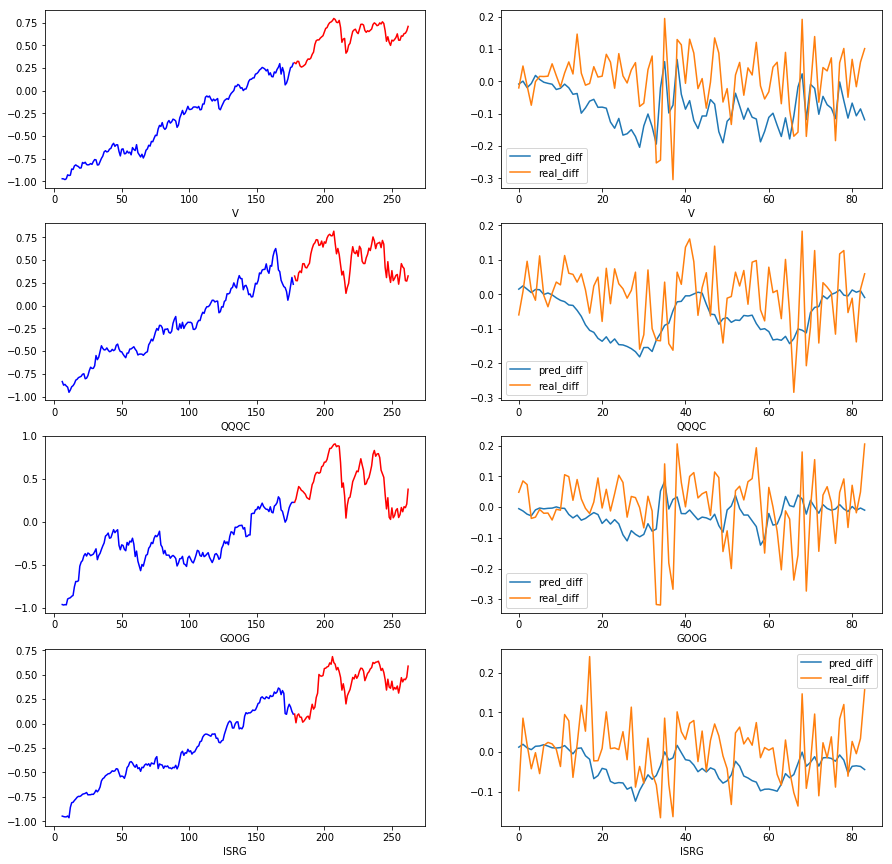

In [5]:
# stock_list = ['LABU','JOBS','AVGO','JPM','MGC','MILN','VGT','QQQC',\
#               'BAC','GOOG','SPLV','BABA','ISRG','FB','AMZN','AAPL','INTC',\
#              'NVDA','MSFT']


stock_list = ['V','QQQC','GOOG','ISRG']
# stock_list = ['VGT','V']
# stock_list = ['VGT','V','QQQC','GOOG','ISRG','FB','AMZN','AAPL','NVDA','MSFT']

# stock_list = ['INTC']

analysis(stock_list)

# len(stock_list)

# for stock in stock_list:
#     print(stock)
#     model = analysis(stock)



In [9]:
stock_list = ['LABU','JOBS','AVGO','JPM','MGC','MILN','VGT','QQQC',\
              'BAC','GOOG','SPLV','BABA','ISRG','FB','AMZN','AAPL','INTC',\
             'NVDA','MSFT']

stock_dict = dict()
for stock in stock_list:
    dataset = read_stock(stock)
    stock_dict[stock] = dataset

import pandas as pd
df = pd.DataFrame(stock_dict)

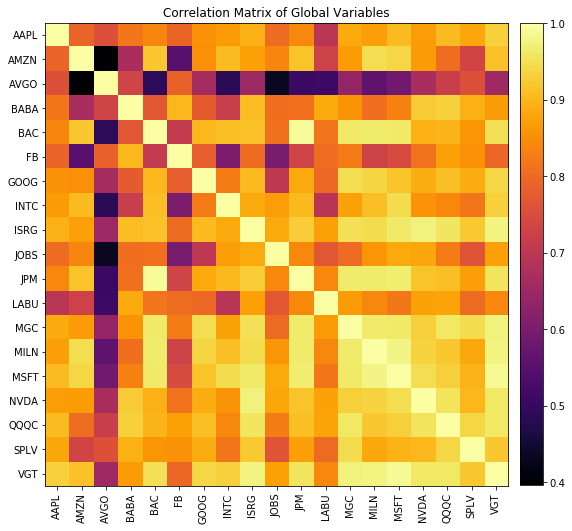

In [10]:

corr = df.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(df.columns))
plt.xticks(labels,df.columns,rotation=90)
plt.yticks(labels,df.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.savefig('feature_correlatin.pdf')
plt.show()

In [11]:
def long_time_naive_agent(index):
    dataset = read_stock(index)
    print(dataset[0])
    print(dataset[-1]-dataset[0])
    return

In [27]:
def long_time_agent_buy_onlyone(index):
    # hurry agent
    benefit = 0
    dataset = read_stock(index)
    num = 1
    for i in range(1,len(dataset)):
        if num > 0:
            if (dataset[i] - dataset[i-1]) > 0.1:
                benefit += dataset[i]
                num = 0
        else:
            if (dataset[i] - dataset[i-1]) < -0.1:
                benefit -= dataset[i]
                num = 1
    if num == 1:
        benefit = dataset[i]
    print(benefit)
    return

In [76]:
def long_time_agent_buy_enough(index):
    benefit = 0
    dataset = read_stock(index)
    print(len(dataset))
    plt.figure(figsize=(15,15))
    plt.plot(dataset)
    num = 1
    max_hold = 1
    for i in range(1,len(dataset)):
        if num > 0:
            if (dataset[i] - dataset[i-1]) > 0.2:
                plt.axvline(x=i,c='r')
                benefit += dataset[i]
                num -= 1
                print(i,' sell')
        if (dataset[i] - dataset[i-1]) < -0.2:
            plt.axvline(x=i,c='g')
            benefit -= dataset[i]
            print(i,' buy')
            num += 1
            max_hold = max(max_hold, num)
#     if num == 1:
    total = num*dataset[i] + benefit-dataset[0]
    print(num, max_hold)
    print(benefit)
    print(total/max_hold)
    fig.savefig(index+'_buy_enough_agent.pdf')
    return

In [14]:
def long_time_agent_buy_sell():
    return

In [51]:
long_time_naive_agent('VGT')

-0.913067027396524
1.6552945201900577


In [ ]:
long_time_agent_buy_onlyone('QQQC')

263
212  buy
215  buy
246  sell
247  buy
3 3
-0.12522622586085452
1.0048410933054235


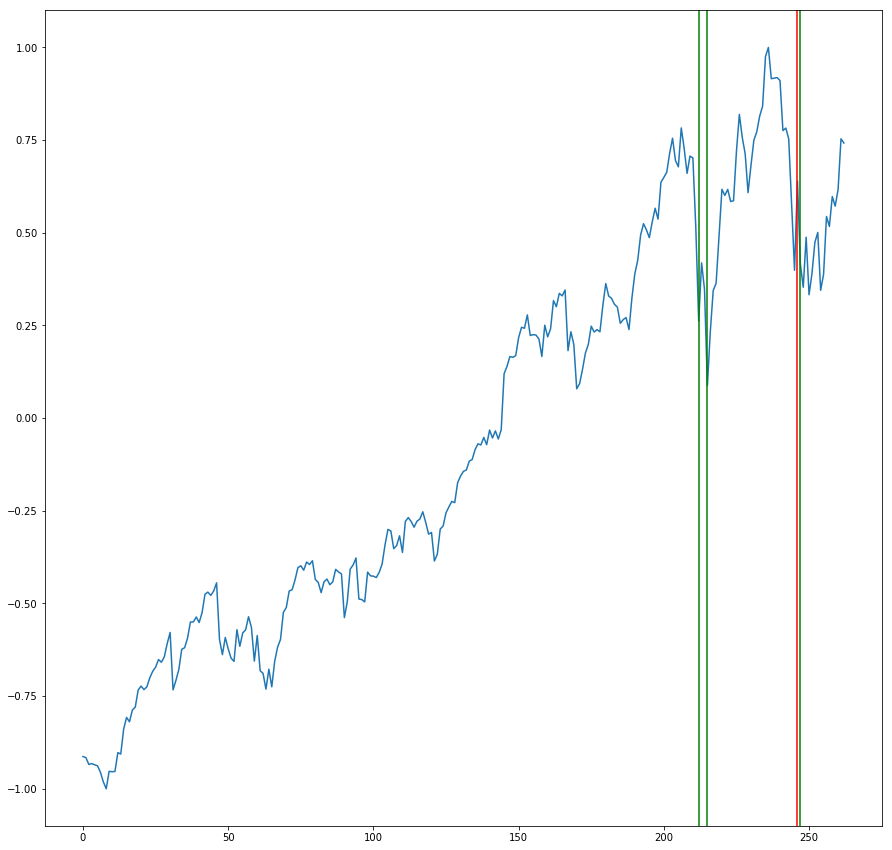

In [77]:
long_time_agent_buy_enough('VGT')
